In [23]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import seaborn as sns
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('/content/cure_the_princess_train.csv')
val_data = pd.read_csv('/content/cure_the_princess_validation.csv')
test_data = pd.read_csv('/content/cure_the_princess_test.csv')

# Convert the data to tensors
x_train = torch.from_numpy(np.array(train_data.iloc[:, :-1])).float()
y_train = torch.from_numpy(np.array(train_data.iloc[:, -1])).float().unsqueeze(1)
x_val = torch.from_numpy(np.array(val_data.iloc[:, :-1])).float()
y_val = torch.from_numpy(np.array(val_data.iloc[:, -1])).float().unsqueeze(1)
x_test = torch.from_numpy(np.array(test_data.iloc[:, :-1])).float()
y_test = torch.from_numpy(np.array(test_data.iloc[:, -1])).float().unsqueeze(1)

# Hyperparameters
epochs = 10
batch_size = 16
learning_rate = 0.1

# MLP oluşturma
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        torch.manual_seed(190401073)
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = x_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
output_size = 1
mlp = MLP(input_size, hidden_size1, hidden_size2, output_size)

# Optimizer ve Loss fonksiyonları tanımlama
optimizer = optim.SGD(mlp.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()

num_epochs = 1000
train_losses = []
val_losses = []
test_losses = []
train_accs = []
val_accs = []
test_accs = []
for epoch in range(num_epochs):
    # Training mode
    mlp.train()
    
    # Forward pass
    y_pred_train = mlp(x_train)
    train_loss = criterion(y_pred_train, y_train)
    train_losses.append(train_loss.item())

    # Backward pass and parameter update
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation mode
    mlp.eval()

    # Forward pass on validation data
    with torch.no_grad():
        y_pred_val = mlp(x_val)
        val_loss = criterion(y_pred_val, y_val)
        val_losses.append(val_loss.item())

    # Forward pass on test data
    with torch.no_grad():
        y_pred_test = mlp(x_test)
        test_loss = criterion(y_pred_test, y_test)
        test_losses.append(test_loss.item())

def evaluate(model, x, y):
    with torch.no_grad():
        y_pred = model(x)
        y_pred = (y_pred > 0.5).float()
        total_acc = (y_pred == y).float().mean().item()
        
        tp = ((y_pred == 1) & (y == 1)).float().sum().item()
        fp = ((y_pred == 1) & (y == 0)).float().sum().item()
        tn = ((y_pred == 0) & (y == 0)).float().sum().item()
        fn = ((y_pred == 0) & (y == 1)).float().sum().item()
        
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = 2 * (precision * recall) / (precision + recall)
        
        loss = F.binary_cross_entropy(y_pred, y)
        
        return total_acc, recall, precision, f1, loss

# Evaluate on train, validation and test sets
results = {}

results["Train"] = evaluate(mlp, x_train, y_train)
results["Validation"] = evaluate(mlp, x_val, y_val)
results["Test"] = evaluate(mlp, x_test, y_test)

for set_name, (acc, recall, precision, f1, loss) in results.items():
    print(f"{set_name} Accuracy: {acc:.4f} Recall: {recall:.4f} Precision: {precision:.4f} F1: {f1:.4f} Loss: {loss:.4f}")

Train Accuracy: 0.9529 Recall: 0.9238 Precision: 0.9794 F1: 0.9508 Loss: 4.7125
Validation Accuracy: 0.9299 Recall: 0.8910 Precision: 0.9653 F1: 0.9267 Loss: 7.0064
Test Accuracy: 0.9301 Recall: 0.8711 Precision: 0.9883 F1: 0.9260 Loss: 6.9948


<Axes: >

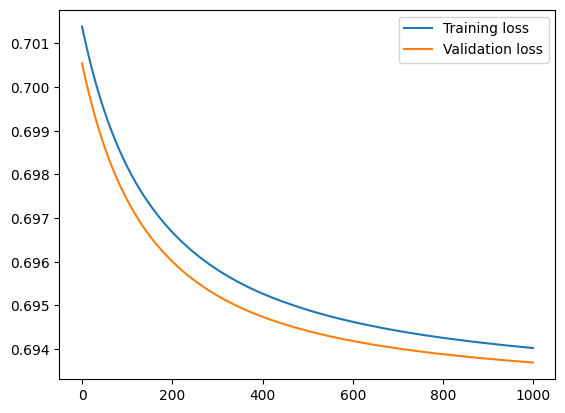

In [22]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('/content/cure_the_princess_train.csv')
val_data = pd.read_csv('/content/cure_the_princess_validation.csv')
test_data = pd.read_csv('/content/cure_the_princess_test.csv')

# Convert the data to tensors
x_train = torch.tensor(train_data.iloc[:, :-1].values, dtype=torch.float)
y_train = torch.tensor(train_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_val = torch.tensor(val_data.iloc[:, :-1].values, dtype=torch.float)
y_val = torch.tensor(val_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_test = torch.tensor(test_data.iloc[:, :-1].values, dtype=torch.float)
y_test = torch.tensor(test_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)

# Hyperparameters
epochs = 10
batch_size = 16
learning_rate = 0.001

# MLP oluşturma
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        torch.manual_seed(190401073)
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = x_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
output_size = 1
mlp = MLP(input_size, hidden_size1, hidden_size2, output_size)

# Optimizer ve Loss fonksiyonları tanımlama
optimizer = optim.SGD(mlp.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()


# Train the model
num_epochs = 1000
train_losses = []
val_losses = []
test_losses = []
train_accs = []
val_accs = []
test_accs = []
for epoch in range(num_epochs):
    # Training mode
    mlp.train()
    
    # Forward pass
    y_pred_train = mlp(x_train)
    train_loss = criterion(y_pred_train, y_train)
    train_losses.append(train_loss.item())

    # Backward pass and parameter update
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation mode
    mlp.eval()

    # Forward pass on validation data
    with torch.no_grad():
        y_pred_val = mlp(x_val)
        val_loss = criterion(y_pred_val, y_val)
        val_losses.append(val_loss.item())

sns.lineplot(x=range(num_epochs), y=train_losses, label="Training loss")
sns.lineplot(x=range(num_epochs), y=val_losses, label="Validation loss")

In [21]:
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('/content/cure_the_princess_train.csv')
val_data = pd.read_csv('/content/cure_the_princess_validation.csv')
test_data = pd.read_csv('/content/cure_the_princess_test.csv')

# Convert the data to tensors
x_train = torch.tensor(train_data.iloc[:, :-1].values, dtype=torch.float)
y_train = torch.tensor(train_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_val = torch.tensor(val_data.iloc[:, :-1].values, dtype=torch.float)
y_val = torch.tensor(val_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)
x_test = torch.tensor(test_data.iloc[:, :-1].values, dtype=torch.float)
y_test = torch.tensor(test_data.iloc[:, -1].values, dtype=torch.float).unsqueeze(1)

# Hyperparameters
epochs = 10
batch_size = 16
learning_rate = 0.4

# MLP oluşturma
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        torch.manual_seed(190401073)
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)  # First dropout layer added
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)  # Second dropout layer added
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)  # First dropout layer applied
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)  # Second dropout layer applied
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

input_size = x_train.shape[1]
hidden_size1 = 100
hidden_size2 = 50
output_size = 1
mlp = MLP(input_size, hidden_size1, hidden_size2, output_size)

# Optimizer ve Loss fonksiyonları tanımlama
optimizer = optim.SGD(mlp.parameters(), lr=learning_rate)
criterion = nn.BCEWithLogitsLoss()

# Train the model
num_epochs = 1000
train_losses = []
val_losses = []
test_losses = []
train_accs = []
val_accs = []
test_accs = []
for epoch in range(num_epochs):
    # Training mode
    mlp.train()
    
    # Forward pass
    y_pred_train = mlp(x_train)
    train_loss = criterion(y_pred_train, y_train)
    
    # L1 regularization
    l1_lambda = 0.001
    l1_reg = torch.tensor(0.)
    for param in mlp.parameters():
        l1_reg += torch.norm(param, 1)
    train_loss += l1_lambda * l1_reg
    
    # L2 regularization
    l2_lambda = 0.001
    l2_reg = torch.tensor(0.)
    for param in mlp.parameters():
        l2_reg += torch.norm(param, 2)
    train_loss += l2_lambda * l2_reg
    
    train_losses.append(train_loss.item())

    # Backward pass and parameter update
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Evaluation mode
    mlp.eval()

    # Forward pass on validation data
    with torch.no_grad():
        y_pred_val = mlp(x_val)
        val_loss = criterion(y_pred_val, y_val)
        
        # L1 regularization
        l1_reg = torch.tensor(0.)
        for param in mlp.parameters():
            l1_reg += torch.norm(param, 1)
        val_loss += l1_lambda * l1_reg

        # L2 regularization
        l2_reg = torch.tensor(0.)
        for param in mlp.parameters():
            l2_reg += torch.norm(param, 2)
        val_loss += l2_lambda * l2_reg
        
        val_losses.append(val_loss.item())

def evaluate(model, x, y):
    with torch.no_grad():
        y_pred = model(x)
        y_pred = (y_pred > 0.5).float()
        total_acc = (y_pred == y).float().mean().item()
        
        tp = ((y_pred == 1) & (y == 1)).float().sum().item()
        fp = ((y_pred == 1) & (y == 0)).float().sum().item()
        tn = ((y_pred == 0) & (y == 0)).float().sum().item()
        fn = ((y_pred == 0) & (y == 1)).float().sum().item()
        
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = 2 * (precision * recall) / (precision + recall)
        
        loss = F.binary_cross_entropy(y_pred, y)
        
        return total_acc, recall, precision, f1, loss

# Evaluate on train, validation and test sets
train_acc, train_recall, train_precision, train_f1, train_loss = evaluate(mlp, x_train, y_train)
val_acc, val_recall, val_precision, val_f1, val_loss = evaluate(mlp, x_val, y_val)
test_acc, test_recall, test_precision, test_f1, test_loss = evaluate(mlp, x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f} Recall: {train_recall:.4f} Precision: {train_precision:.4f} F1: {train_f1:.4f} Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f} Recall: {val_recall:.4f} Precision: {val_precision:.4f} F1: {val_f1:.4f} Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f} Recall: {test_recall:.4f} Precision: {test_precision:.4f} F1: {test_f1:.4f} Loss: {test_loss:.4f}")

Train Accuracy: 0.9169 Recall: 0.8476 Precision: 0.9812 F1: 0.9096 Loss: 8.3067
Validation Accuracy: 0.9395 Recall: 0.8782 Precision: 1.0000 F1: 0.9352 Loss: 6.0510
Test Accuracy: 0.9016 Recall: 0.8067 Precision: 0.9968 F1: 0.8917 Loss: 9.8446
